In [1]:
#### Import packages needed (and some not needed....)

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib as plt
print(plt.__name__, plt.__version__)

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

import matplotlib.pyplot as plt

C:\Users\CABED117\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\CABED117\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\CABED117\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


pandas 1.5.2
numpy 1.24.4
matplotlib 3.7.2
scipy 1.10.0
seaborn 0.12.2


## Overall content

In [2]:
#Open excel with entries, quite long to load

df_fungir = pd.read_excel("FungAMR_070425.xlsx", header=0)
df_fungir

,Unnamed: 0,first author name,journal,year,pubmedid,species,gene or protein name,drug,mutation,confidence score,...,ortho_res,accession number for protein name,source of accession number,strain_ID,curator,ref_seq_uniprot_accession,Verification,ID,mutation_type,mutation_composition
0,0,Albertini,European Journal of Plant Pathology,2003,https://doi.org/10.1023/A:1022584822191,Tapesia acuformis,Cyp51,Prochloraz,Y486H,7.0,...,NaN,AAF18468.1,GenBank,94BE14T,NAR3,Q9UV04,Polymorphism.,1,SNPs,single
1,1,Albertini,European Journal of Plant Pathology,2003,https://doi.org/10.1023/A:1022584822191,Tapesia acuformis,Cyp51,Flusilazole,Y486H,7.0,...,NaN,AAF18468.1,GenBank,94BE14T,NAR3,Q9UV04,Polymorphism.,2,SNPs,single
2,2,Albertini,European Journal of Plant Pathology,2003,https://doi.org/10.1023/A:1022584822191,Tapesia acuformis,Cyp51,Triadimenol,Y486H,7.0,...,NaN,AAF18468.1,GenBank,94BE14T,NAR3,Q9UV04,Polymorphism.,3,SNPs,single
3,3,Tashiro,Antimicrobial Agents and Chemotherapy,2012,22751542,Aspergillus fumigatus,Cyp51A,Itraconazole,I266N,8.0,...,NaN,AGH55425.1|Afu4g06890,Genbak,MF-452,DMS,Q4WNT5,Polymorphism.Alt aa is wt in ref seq.,4,SNPs,single
4,4,Lepak,Antimicrobial Agents and Chemotherapy,2012,22948870,Nakaseomyces glabratus,Fks2,Anidulafungin,F659V,8.0,...,OR_0288,CAGL0K04037g,NCBI,CG 10956,DDL,Q6FMZ3,OK.,5,SNPs,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35787,35784,Sionov,PLOS Pathogens,2010,20368972,Cryptococcus neoformans,"Chr1,Chr10,Chr14,Chr4",Fluconazole,Chr1x2|Chr10x2|Chr14x2|Chr4x2,8.0,...,NaN,NaN,NaN,H99-R128,DJ,NaN,No ref seq.,55622,CNVs,multi_multi_gene
35788,35785,Sionov,PLOS Pathogens,2010,20368972,Cryptococcus neoformans,"Chr1,Chr4,Erg11",Fluconazole,Chr1x2|Chr4x2|Duplication,8.0,...,NaN,NaN,NaN,C1345-R64,DJ,"nan,Q9P8P1",OK.,55623,CNVs,multi_multi_gene
35789,35786,Sionov,PLOS Pathogens,2010,20368972,Cryptococcus neoformans,"Chr1,Chr4,Erg11",Fluconazole,Chr1x2|Chr4x2|Duplication,8.0,...,NaN,NaN,NaN,C1345-R128,DJ,"nan,Q9P8P1",OK.,55624,CNVs,multi_multi_gene
35790,35787,Selmecki,Molecular Microbiology,2008,18363649,Candida albicans,"Chr4,Chr5,Chr6",Fluconazole,"Chr4x1|Chr5x1,isochromosome [i(5L)]|Chr6x1",6.0,...,NaN,NaN,NaN,YJB9544-FH6,DJ,NaN,No ref seq.,55626,CNVs,multi_multi_gene


In [3]:
##create a way to get all unique mutations for the df_fungir

# Create a mini df as a test
data = {
    'gene or protein name': ['Fks1,Fks2',"Erg11,Fks1,Tac1","Cyp51A,Pdr1"],

    'mutation': ['S629P|S663P','P432D|G322A|I325S',"G342S,C453A,D506A|K563R"]
}
df = pd.DataFrame(data)

# Split the 'gene or protein name' column on ',' and explode
df_expanded = df.assign(**{'gene or protein name': df['gene or protein name'].str.split(',')}).explode('gene or protein name')

# Split the 'mutation' column on '|' and explode
df_expanded['mutation'] = df['mutation'].str.split('|').explode()

# Create a new df by combining each gene with its corresponding mutation
new_data = []
for gene, mutation in zip(df_expanded['gene or protein name'], df_expanded['mutation']):
    new_data.append([gene,  mutation])

df_new = pd.DataFrame(new_data, columns=['gene or protein name',  'mutation'])

df_new.reset_index(drop=True, inplace=True)

# Split the 'mutation' column on ',' 
df_new["mutation"] = df_new['mutation'].str.split(',')

# Explode the "mutation" column
df_new = df_new.explode("mutation")

df_new.reset_index(drop=True)

,gene or protein name,mutation
0,Fks1,S629P
1,Fks2,S663P
2,Erg11,P432D
3,Fks1,G322A
4,Tac1,I325S
5,Cyp51A,G342S
6,Cyp51A,C453A
7,Cyp51A,D506A
8,Pdr1,K563R


In [4]:
##now apply to the whole dataframe

df_m = df_fungir.copy()

# Add a unique identifier to each row
df_m = df_fungir.copy()
df_m['id'] = range(1, len(df_m) + 1)

# Split the 'ortho_homolog' column on ',' and explode
df_expanded = df_m.assign(**{'ortho_homolog': df_m['ortho_homolog'].str.split(',')}).explode('ortho_homolog')

# Split the 'mutation' column on '|' and explode
df_expanded = df_expanded.assign(**{'mutation': df_expanded['mutation'].str.split('|')}).explode('mutation')

# Create a new df e by combining each gene with its corresponding mutation and species
new_data = []

for gene, mutation, species in zip(df_expanded['ortho_homolog'], df_expanded['mutation'], df_expanded['species']):
    new_data.append([gene, mutation, species])

df_mut = pd.DataFrame(new_data, columns=['ortho_homolog', 'mutation', 'species'])

df_mut.reset_index(drop=True, inplace=True)

# Split the 'mutation' column on ','
df_mut['mutation'] = df_mut['mutation'].str.split(',')

# Explode the 'mutation' column
df_mut = df_mut.explode('mutation')

df_mut['gene and mutation'] = df_mut['ortho_homolog'] + "_" + df_mut['mutation'] + "_" + df_mut['species']

df_mut.reset_index(drop=True, inplace=True)

print(str(len(df_mut['gene and mutation'].unique())) + " unique mutations")

df_mut

10579 unique mutations


,ortho_homolog,mutation,species,gene and mutation
0,Cyp51,Y486H,Tapesia acuformis,Cyp51_Y486H_Tapesia acuformis
1,Cyp51,Y486H,Tapesia acuformis,Cyp51_Y486H_Tapesia acuformis
2,Cyp51,Y486H,Tapesia acuformis,Cyp51_Y486H_Tapesia acuformis
3,Cyp51,I266N,Aspergillus fumigatus,Cyp51_I266N_Aspergillus fumigatus
4,Fks,F659V,Nakaseomyces glabratus,Fks_F659V_Nakaseomyces glabratus
...,...,...,...,...
44400,Chr6,Chr6x1,Candida albicans,Chr6_Chr6x1_Candida albicans
44401,Chr3,Chr3x3,Candida albicans,Chr3_Chr3x3_Candida albicans
44402,Chr3,Chr6x3,Candida albicans,Chr3_Chr6x3_Candida albicans
44403,Chr6,Chr3x3,Candida albicans,Chr6_Chr3x3_Candida albicans


In [5]:
##Overall total content

print("Number of studies : " + str(len(df_fungir["pubmedid"].unique())))

print("Number of entries : " + str(len(df_fungir)))

neg = df_fungir[df_fungir["confidence score"]<0]
print("Number of negative score : " + str(len(neg)))

pos = df_fungir[df_fungir["confidence score"]>0]
print("Number of positive score : " + str(len(pos)))

#number of entries for each drug
drug_counts = df_fungir['drug'].nunique()
print("Different drug : " + str(drug_counts))

#number of different mutation
mutation_counts = len(df_mut["gene and mutation"].unique())
print("Different mutations : " + str(mutation_counts))

#number of different genes
gene_counts = len(df_mut["ortho_homolog"].unique())
print("Different genes : " + str(gene_counts))

#number of different species
species_counts = df_fungir["species"].nunique()
print("Different species : " + str(species_counts))

Number of studies : 501
Number of entries : 35792
Number of negative score : 21438
Number of positive score : 14353
Different drug : 208
Different mutations : 10579
Different genes : 246
Different species : 95


In [6]:
# Count occurrences of each degree of evidence
degree_counts = df_fungir['confidence score'].value_counts().sort_index()

# Combine categories 3 and -3
combined_count = degree_counts.get(3, 0) + degree_counts.get(-3, 0)

# Sum counts for all other categories
other_counts = degree_counts.drop([3, -3], errors='ignore').sum()

# Create a new DataFrame with combined and other categories
new_data = {
    'degree of evidence': ['3/-3', 'Others'],
    'count': [combined_count, other_counts]
}
df_combined = pd.DataFrame(new_data)

df_combined

,degree of evidence,count
0,3/-3,27224
1,Others,8567


In [7]:
# Create a new DataFrame with combined and other categories
new_data = {
    'confidence score': ['3', '-3'],
    'count': [degree_counts.get(3, 0), degree_counts.get(-3, 0)]
}
df_combined = pd.DataFrame(new_data)

df_combined

,confidence score,count
0,3,7702
1,-3,19522


In [8]:
# Count occurrences of each degree of evidence
degree_counts = df_fungir['confidence score'].value_counts().sort_index()

# Combine counts for positive and negative values for each pair
combined_counts = degree_counts.copy()
combined_counts[1] += degree_counts.get(-1, 0)
combined_counts[2] += degree_counts.get(-2, 0)
combined_counts[4] += degree_counts.get(-4, 0)
combined_counts[5] += degree_counts.get(-5, 0)
combined_counts[6] += degree_counts.get(-6, 0)
combined_counts[7] += degree_counts.get(-7, 0)
combined_counts[8] += degree_counts.get(-8, 0)

# Create a new DataFrame with combined categories
combined_data = {
    'confidence score': ['1/-1', '2/-2', '4/-4', '5/-5', '6/-6', '7/-7', '8/-8'],
    'count': [combined_counts.get(1, 0), combined_counts.get(2, 0), combined_counts.get(4, 0),
              combined_counts.get(5, 0), combined_counts.get(6, 0), combined_counts.get(7, 0),
              combined_counts.get(8, 0)]
}
df_combined2 = pd.DataFrame(combined_data)

df_combined2

,confidence score,count
0,1/-1,1264
1,2/-2,431
2,4/-4,886
3,5/-5,222
4,6/-6,144
5,7/-7,681
6,8/-8,4939


In [9]:
# Count occurrences of each degree of evidence
degree_counts = df_fungir['confidence score'].value_counts().sort_index()

# Combine counts for positive and negative values for each pair
combined_counts = degree_counts.copy()

# Create a new DataFrame with combined categories
combined_data = {
    'confidence score': ['1', '2', "3", '4', '5', '6', '7', '8'],
    'count': [combined_counts.get(1, 0), combined_counts.get(2, 0), degree_counts.get(3, 0), combined_counts.get(4, 0),
              combined_counts.get(5, 0), combined_counts.get(6, 0), combined_counts.get(7, 0),
              combined_counts.get(8, 0)]
}
df_com_pos = pd.DataFrame(combined_data)

df_com_pos

,confidence score,count
0,1,945
1,2,371
2,3,7702
3,4,771
4,5,113
5,6,61
6,7,675
7,8,3715


In [10]:
# Count occurrences of each degree of evidence
degree_counts = df_fungir['confidence score'].value_counts().sort_index()

# Combine counts for positive and negative values for each pair
combined_counts = degree_counts.copy()

# Create a new DataFrame with combined categories
combined_data = {
    'confidence score': ['-1', '-2',"-3", '-4', '-5', '-6', '-7', '-8'],
    'count': [combined_counts.get(-1, 0), combined_counts.get(-2, 0), degree_counts.get(-3, 0), combined_counts.get(-4, 0),
              combined_counts.get(-5, 0), combined_counts.get(-6, 0), combined_counts.get(-7, 0),
              combined_counts.get(-8, 0)]
}
df_com_neg = pd.DataFrame(combined_data)

df_com_neg

,confidence score,count
0,-1,319
1,-2,60
2,-3,19522
3,-4,115
4,-5,109
5,-6,83
6,-7,6
7,-8,1224


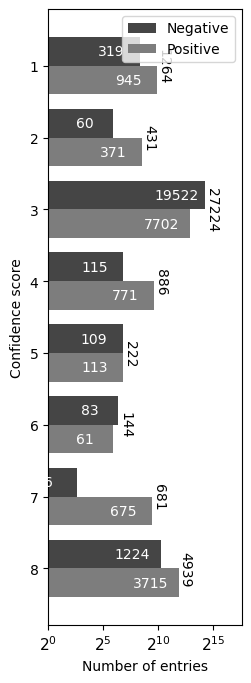

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'degree of evidence' to string type and make negative degrees positive
df_com_pos['confidence score'] = df_com_pos['confidence score'].astype(str)
df_com_neg['confidence score'] = df_com_neg['confidence score'].astype(str).str.replace('-', '')

df_com_pos = df_com_pos.sort_values(by="confidence score", ascending=False)
df_com_neg = df_com_neg.sort_values(by="confidence score", ascending=False)

# Merge the dataframes on 'degree of evidence'
df_combined = pd.merge(df_com_pos, df_com_neg, on='confidence score', how='outer', suffixes=('_pos', '_neg')).fillna(0)
df_combined = df_combined.sort_values(by="confidence score", ascending=False)

# Calculate total counts for each degree of evidence
df_combined['total_count'] = df_combined['count_pos'] + df_combined['count_neg']

# Plot the histograms
plt.figure(figsize=(2.5, 8))

# Define the width of the bars and the positions for each bar
bar_width = 0.4
indices = np.arange(len(df_combined))

# Plot the histogram with side-by-side bars on log2 scale
plt.barh(indices + bar_width / 2, df_combined['count_neg'], height=bar_width, color='#454545', label='Negative')
plt.barh(indices - bar_width / 2, df_combined['count_pos'], height=bar_width, color='#7D7D7D', label='Positive')


plt.yticks(indices, df_combined['confidence score'], size = 10)
plt.xticks(size=11)
plt.xlabel('Number of entries', size = 10)
plt.ylabel('Confidence score', size = 10)
plt.legend()
plt.grid(axis='x')

# Annotate the bars with the actual counts
for index, row in df_combined.iterrows():
 
    plt.text(row['count_pos'] / 6, index - bar_width / 2, str(int(row['count_pos'])), va='center', ha='center', color='white',size=10)
    plt.text(row['count_neg'] / 6, index + bar_width / 2, str(int(row['count_neg'])), va='center', ha='center', color='white', size =10)  
    
    # Annotate the total count on top of each bar
    
    if row['count_pos'] > row['count_neg']:
        total = row['count_pos']
    else:
        total = row['count_neg']

    plt.text(total, index, str(int(row['total_count'])), va='center', color='black', rotation=270, size=10)   

        
plt.xscale('log', base=2)
plt.xlim(1,200000)
plt.grid(False)
plt.rcParams['svg.fonttype'] = 'none'

plt.savefig('content_of_the_database_degree_of_evidence_2025-02.svg', format='svg')
# Show the plot
plt.show()

In [12]:
##df with only 3 score entries

df_only3 = df_fungir[(df_fungir["confidence score"] == 3) | (df_fungir["confidence score"] == -3)]
df_only3

,Unnamed: 0,first author name,journal,year,pubmedid,species,gene or protein name,drug,mutation,confidence score,...,ortho_res,accession number for protein name,source of accession number,strain_ID,curator,ref_seq_uniprot_accession,Verification,ID,mutation_type,mutation_composition
4338,4338,Després,Nature Ecology and Evolution,2022,36050399,Saccharomyces cerevisiae,Fcy1,5-fluorocytosine,A18C,-3.0,...,NaN,Q12178,uniprot,BY4741,PCD2,Q12178,OK.,4400,SNPs,single
4339,4339,Després,Nature Ecology and Evolution,2022,36050399,Saccharomyces cerevisiae,Fcy1,5-fluorocytosine,A18D,3.0,...,OR_0272,Q12178,uniprot,BY4741,PCD2,Q12178,OK.,4401,SNPs,single
4340,4340,Després,Nature Ecology and Evolution,2022,36050399,Saccharomyces cerevisiae,Fcy1,5-fluorocytosine,A18E,3.0,...,NaN,Q12178,uniprot,BY4741,PCD2,Q12178,OK.,4402,SNPs,single
4341,4341,Després,Nature Ecology and Evolution,2022,36050399,Saccharomyces cerevisiae,Fcy1,5-fluorocytosine,A18F,3.0,...,NaN,Q12178,uniprot,BY4741,PCD2,Q12178,OK.,4403,SNPs,single
4342,4342,Després,Nature Ecology and Evolution,2022,36050399,Saccharomyces cerevisiae,Fcy1,5-fluorocytosine,A18G,-3.0,...,NaN,Q12178,uniprot,BY4741,PCD2,Q12178,OK.,4404,SNPs,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32590,32590,Durand,bioRxiv,2024,10.1101/2024.07.21.604487,Saccharomyces cerevisiae,Fks1,Micafungin,D1353R,-3.0,...,OR_0317,NaN,NaN,NaN,RD3,P38631,OK.,32708,SNPs,single
32591,32591,Durand,bioRxiv,2024,10.1101/2024.07.21.604487,Saccharomyces cerevisiae,Fks1,Micafungin,D1353S,3.0,...,OR_0317,NaN,NaN,NaN,RD3,P38631,OK.,32709,SNPs,single
32592,32592,Durand,bioRxiv,2024,10.1101/2024.07.21.604487,Saccharomyces cerevisiae,Fks1,Micafungin,D1353T,-3.0,...,OR_0317,NaN,NaN,NaN,RD3,P38631,OK.,32710,SNPs,single
32593,32593,Durand,bioRxiv,2024,10.1101/2024.07.21.604487,Saccharomyces cerevisiae,Fks1,Micafungin,D1353V,3.0,...,OR_0317,NaN,NaN,NaN,RD3,P38631,OK.,32711,SNPs,single


In [13]:
## Total content score 3 only

print("Number of studies : " + str(len(df_only3["pubmedid"].unique())))

print("Number of entries : " + str(len(df_only3)))

neg = df_only3[df_only3["confidence score"]<0]
print("Number of negative score : " + str(len(neg)))

pos = df_only3[df_only3["confidence score"]>0]
print("Number of positive score : " + str(len(pos)))

#number of entries for each drug
df_drug = df_only3.copy()
df_drug['drug'] = df_drug['drug'].str.split(r',\s*|\s+and\s+')
df_drug = df_drug.explode('drug')
drug_counts = df_drug['drug'].nunique()
print("Different drug : " + str(drug_counts))

#number of different mutation
df_only3["gene and mutation"] = df_only3["ortho_homolog"] + "_" + df_only3["mutation"]
mutation_counts = df_only3['gene and mutation'].nunique()
print("Different mutations : " + str(mutation_counts))

#number of different gene
gene_counts = df_only3['gene or protein name'].nunique()
print("Different genes : " + str(gene_counts))

#number of different species
df_species = df_only3.copy()
df_species['species'] = df_species['species'].str.split(r',\s*|\s+and\s+')
df_species = df_species.explode('species')
species_counts = df_species['species'].nunique()
print("Different species : " + str(species_counts))

Number of studies : 4
Number of entries : 27224
Number of negative score : 19522
Number of positive score : 7702
Different drug : 11
Different mutations : 7585
Different genes : 4
Different species : 3


C:\Users\CABED117\AppData\Local\Temp\ipykernel_22108\4006739814.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only3["gene and mutation"] = df_only3["ortho_homolog"] + "_" + df_only3["mutation"]


In [14]:
##df excluding all confidence 3 score entries

df_not3 = df_fungir[(df_fungir["confidence score"] != 3) & (df_fungir["confidence score"] != -3)]
df_not3

,Unnamed: 0,first author name,journal,year,pubmedid,species,gene or protein name,drug,mutation,confidence score,...,ortho_res,accession number for protein name,source of accession number,strain_ID,curator,ref_seq_uniprot_accession,Verification,ID,mutation_type,mutation_composition
0,0,Albertini,European Journal of Plant Pathology,2003,https://doi.org/10.1023/A:1022584822191,Tapesia acuformis,Cyp51,Prochloraz,Y486H,7.0,...,NaN,AAF18468.1,GenBank,94BE14T,NAR3,Q9UV04,Polymorphism.,1,SNPs,single
1,1,Albertini,European Journal of Plant Pathology,2003,https://doi.org/10.1023/A:1022584822191,Tapesia acuformis,Cyp51,Flusilazole,Y486H,7.0,...,NaN,AAF18468.1,GenBank,94BE14T,NAR3,Q9UV04,Polymorphism.,2,SNPs,single
2,2,Albertini,European Journal of Plant Pathology,2003,https://doi.org/10.1023/A:1022584822191,Tapesia acuformis,Cyp51,Triadimenol,Y486H,7.0,...,NaN,AAF18468.1,GenBank,94BE14T,NAR3,Q9UV04,Polymorphism.,3,SNPs,single
3,3,Tashiro,Antimicrobial Agents and Chemotherapy,2012,22751542,Aspergillus fumigatus,Cyp51A,Itraconazole,I266N,8.0,...,NaN,AGH55425.1|Afu4g06890,Genbak,MF-452,DMS,Q4WNT5,Polymorphism.Alt aa is wt in ref seq.,4,SNPs,single
4,4,Lepak,Antimicrobial Agents and Chemotherapy,2012,22948870,Nakaseomyces glabratus,Fks2,Anidulafungin,F659V,8.0,...,OR_0288,CAGL0K04037g,NCBI,CG 10956,DDL,Q6FMZ3,OK.,5,SNPs,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35787,35784,Sionov,PLOS Pathogens,2010,20368972,Cryptococcus neoformans,"Chr1,Chr10,Chr14,Chr4",Fluconazole,Chr1x2|Chr10x2|Chr14x2|Chr4x2,8.0,...,NaN,NaN,NaN,H99-R128,DJ,NaN,No ref seq.,55622,CNVs,multi_multi_gene
35788,35785,Sionov,PLOS Pathogens,2010,20368972,Cryptococcus neoformans,"Chr1,Chr4,Erg11",Fluconazole,Chr1x2|Chr4x2|Duplication,8.0,...,NaN,NaN,NaN,C1345-R64,DJ,"nan,Q9P8P1",OK.,55623,CNVs,multi_multi_gene
35789,35786,Sionov,PLOS Pathogens,2010,20368972,Cryptococcus neoformans,"Chr1,Chr4,Erg11",Fluconazole,Chr1x2|Chr4x2|Duplication,8.0,...,NaN,NaN,NaN,C1345-R128,DJ,"nan,Q9P8P1",OK.,55624,CNVs,multi_multi_gene
35790,35787,Selmecki,Molecular Microbiology,2008,18363649,Candida albicans,"Chr4,Chr5,Chr6",Fluconazole,"Chr4x1|Chr5x1,isochromosome [i(5L)]|Chr6x1",6.0,...,NaN,NaN,NaN,YJB9544-FH6,DJ,NaN,No ref seq.,55626,CNVs,multi_multi_gene


In [15]:
##now apply to the whole dataframe

df_m = df_not3.copy()

df_m['id'] = range(1, len(df_m) + 1)

# Split the 'ortho_homolog' column on ',' and explode
df_expanded = df_m.assign(**{'ortho_homolog': df_m['ortho_homolog'].str.split(',')}).explode('ortho_homolog')

# Split the 'mutation' column on '|' and explode
df_expanded = df_expanded.assign(**{'mutation': df_expanded['mutation'].str.split('|')}).explode('mutation')

# Create a new df e by combining each gene with its corresponding mutation and species
new_data = []

for gene, mutation, species in zip(df_expanded['ortho_homolog'], df_expanded['mutation'], df_expanded['species']):
    new_data.append([gene, mutation, species])

df_mut = pd.DataFrame(new_data, columns=['ortho_homolog', 'mutation', 'species'])

df_mut.reset_index(drop=True, inplace=True)

# Split the 'mutation' column on ','
df_mut['mutation'] = df_mut['mutation'].str.split(',')

# Explode the 'mutation' column
df_mut = df_mut.explode('mutation')

df_mut['gene and mutation'] = df_mut['ortho_homolog'] + "_" + df_mut['mutation'] + "_" + df_mut['species']

df_mut.reset_index(drop=True, inplace=True)

print(str(len(df_mut['gene and mutation'].unique())) + " unique mutations")

df_mut

3055 unique mutations


,ortho_homolog,mutation,species,gene and mutation
0,Cyp51,Y486H,Tapesia acuformis,Cyp51_Y486H_Tapesia acuformis
1,Cyp51,Y486H,Tapesia acuformis,Cyp51_Y486H_Tapesia acuformis
2,Cyp51,Y486H,Tapesia acuformis,Cyp51_Y486H_Tapesia acuformis
3,Cyp51,I266N,Aspergillus fumigatus,Cyp51_I266N_Aspergillus fumigatus
4,Fks,F659V,Nakaseomyces glabratus,Fks_F659V_Nakaseomyces glabratus
...,...,...,...,...
17176,Chr6,Chr6x1,Candida albicans,Chr6_Chr6x1_Candida albicans
17177,Chr3,Chr3x3,Candida albicans,Chr3_Chr3x3_Candida albicans
17178,Chr3,Chr6x3,Candida albicans,Chr3_Chr6x3_Candida albicans
17179,Chr6,Chr3x3,Candida albicans,Chr6_Chr3x3_Candida albicans


In [16]:
#number of entries overall for all non score 3 DMS entries

print("Number of studies : " + str(len(df_not3["pubmedid"].unique())))

print("Number of entries : " + str(len(df_not3)))

neg = df_not3[df_not3["confidence score"]<0]
print("Number of negative score : " + str(len(neg)))

pos = df_not3[df_not3["confidence score"]>0]
print("Number of positive score : " + str(len(pos)))

df_drug = df_not3.copy()
df_drug['drug'] = df_drug['drug'].str.split(r',\s*|\s+and\s+')
df_drug = df_drug.explode('drug')
drug_counts = df_drug['drug'].nunique()
print("Different drug : " + str(drug_counts))

#number of different mutation
mutation_counts = len(df_mut["gene and mutation"].unique())
print("Different mutations : " + str(mutation_counts))

#number of different gene
gene_counts = df_mut['ortho_homolog'].nunique()
print("Different genes : " + str(gene_counts))

#number of different species 
species_counts = df_not3['species'].nunique()
print("Different species : " + str(species_counts))

Number of studies : 498
Number of entries : 8568
Number of negative score : 1916
Number of positive score : 6651
Different drug : 207
Different mutations : 3055
Different genes : 246
Different species : 95


In [17]:
#how many higher than 6 confidence entries (low confidence entries)

higher_6pos = df_not3[(df_not3["confidence score"] >= 6)] #6,7,8
higher_6neg = df_not3[(df_not3["confidence score"] <= -6)] #-6,-7,-8

print("Number of positive confidence higher than 6 : " + str(len(higher_6pos)))
print("Number of negative confidence higher than 6 : " + str(len(higher_6neg)))

print("total low confidence : " + str((len(higher_6pos)+len(higher_6neg))))
print("Percentage low confidence : " + str(((len(higher_6pos)+len(higher_6neg))/len(df_not3))*100))

Number of positive confidence higher than 6 : 4451
Number of negative confidence higher than 6 : 1313
total low confidence : 5764
Percentage low confidence : 67.27357609710552


In [18]:
#how many 1 and 2 confidence entries

higher_2pos = df_not3[(df_not3["confidence score"] == 2) | (df_not3["confidence score"] == 1)]
higher_2neg = df_not3[(df_not3["confidence score"] == -2) | (df_not3["confidence score"] == -1)] 

score2 = df_not3[(df_not3["confidence score"] == 2) | (df_not3["confidence score"] == -2)]
score1 = df_not3[(df_not3["confidence score"] == 1) | (df_not3["confidence score"] == -1)]

print("Number of positive confidence lower than 2 : " + str(len(higher_2pos)))
print("Number of negative confidence lower than 2 : " + str(len(higher_2neg)))

print("total high confidence: " + str(len(higher_2pos)+len(higher_2neg)))
print("Percentage high confidence : " + str(((len(higher_2pos)+len(higher_2neg))/len(df_not3))*100))

print("Number of confidence score = 2 : " + str(len(score2)))
print("Number of confidence score = 1 : " + str(len(score1)))

Number of positive confidence lower than 2 : 1316
Number of negative confidence lower than 2 : 379
total high confidence: 1695
Percentage high confidence : 19.782913165266105
Number of confidence score = 2 : 431
Number of confidence score = 1 : 1264


C:\Users\CABED117\AppData\Local\Temp\ipykernel_22108\3750337645.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genes['ortho_homolog'] = df_genes['ortho_homolog'].apply(lambda x: 'Fks' if x.startswith('Fks') else x)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_22108\3750337645.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genes['ortho_homolog'] = df_genes['ortho_homolog'].apply(lambda x: 'Cyp51' if x.startswith('Erg11') else x)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_22108\3750337

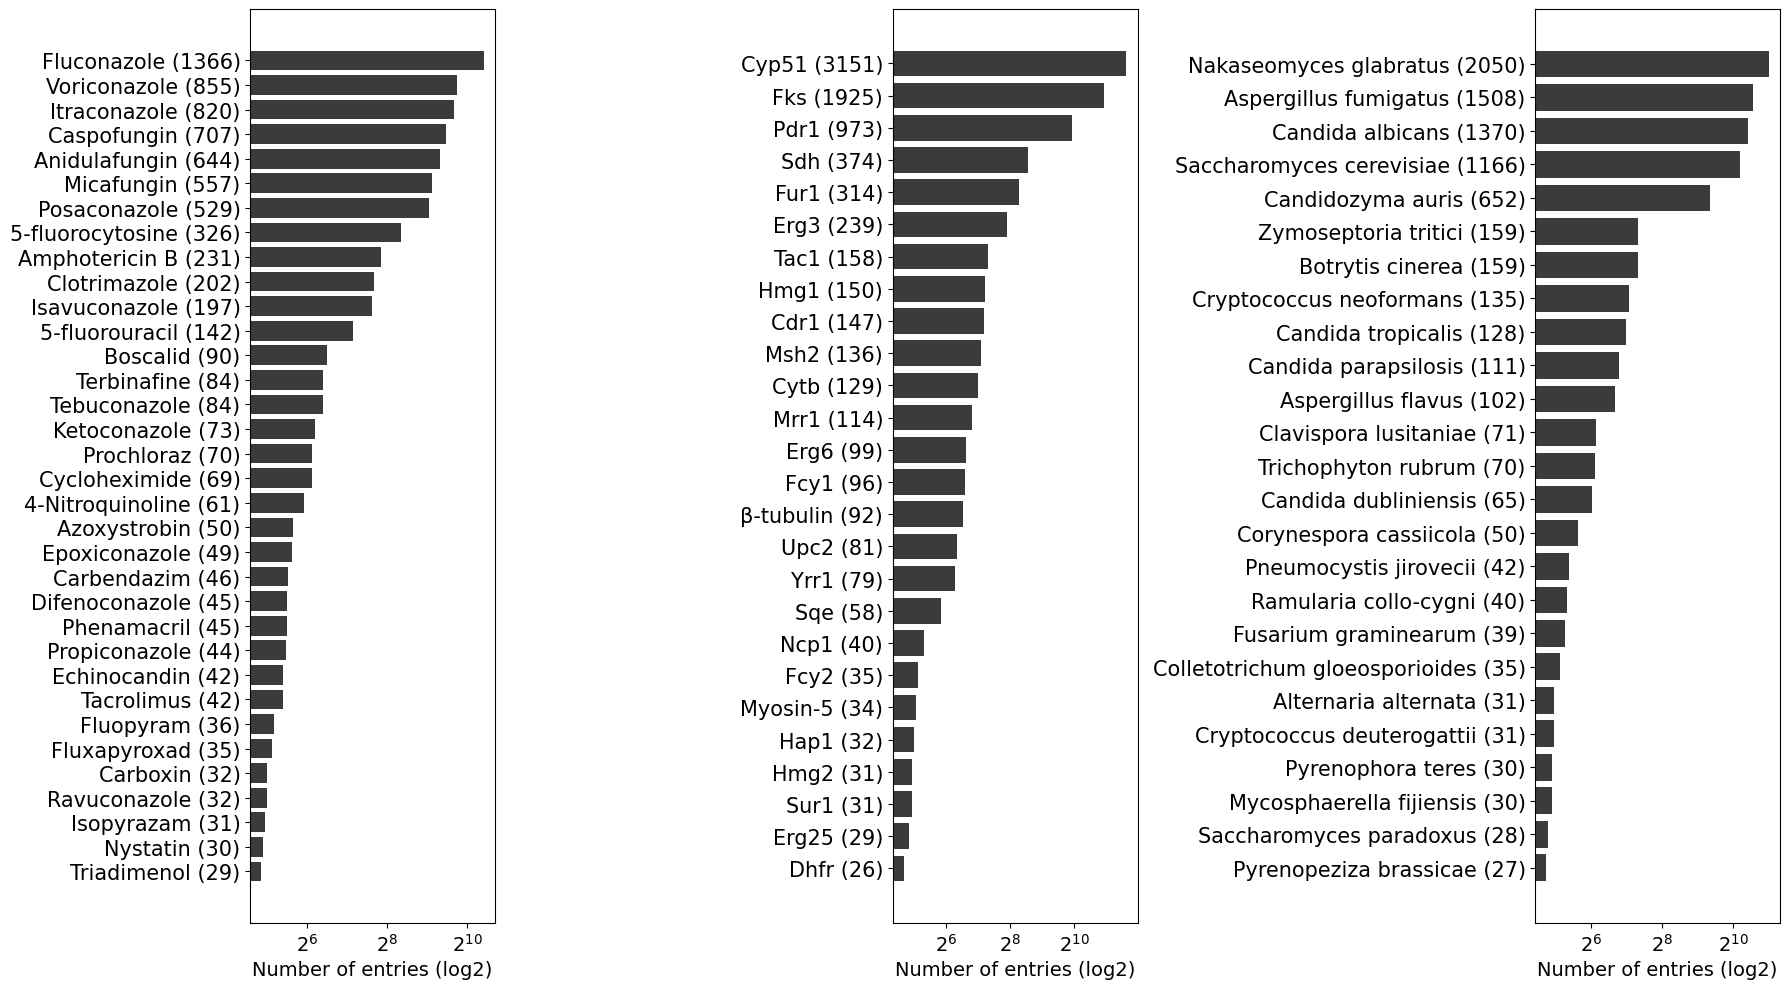

In [25]:
##Show all the data, except for confidence score 3

filtered_drugs = df_not3['drug'].value_counts()[df_not3['drug'].value_counts() > 25].index.tolist()
df_drugs = df_not3[df_not3['drug'].isin(filtered_drugs)]

df_gene = df_not3.copy()
df_gene['ortho_homolog'] = df_gene['ortho_homolog'].str.split(',')
df_gene = df_gene.explode('ortho_homolog')

filtered_genes = df_gene['ortho_homolog'].value_counts()[df_gene['ortho_homolog'].value_counts() > 25].index.tolist()
df_genes = df_gene[df_gene['ortho_homolog'].isin(filtered_genes)]
df_genes['ortho_homolog'] = df_genes['ortho_homolog'].apply(lambda x: 'Fks' if x.startswith('Fks') else x)
df_genes['ortho_homolog'] = df_genes['ortho_homolog'].apply(lambda x: 'Cyp51' if x.startswith('Erg11') else x)
df_genes['ortho_homolog'] = df_genes['ortho_homolog'].apply(lambda x: 'Sqe' if x.startswith('Squalene epoxidase') else x)
df_genes['ortho_homolog'] = df_genes['ortho_homolog'].apply(lambda x: 'Cytb' if x.startswith('Cytochrome b') else x)
df_genes['ortho_homolog'] = df_genes['ortho_homolog'].apply(lambda x: 'β-tubulin' if x.startswith('Beta-tubulin') else x)

df_genes = df_genes[df_genes["ortho_homolog"]!="Chr1"] 
df_genes = df_genes[df_genes["ortho_homolog"]!="Chr4"] 
df_genes = df_genes[df_genes["ortho_homolog"]!="Chr6"] 
df_genes = df_genes[df_genes["ortho_homolog"]!="Cyp51 promoter"] 

legend_labels_drugs = [
    f"{label} ({count})" for label, count in df_drugs['drug'].value_counts().items()
]

legend_labels_genes = [
    f"{label} ({count})" for label, count in df_genes["ortho_homolog"].value_counts().items()
]

legend_labels_species = [
    f"{label} ({count})" for label, count in df_species['species'].value_counts().items()
]

filtered_species = df_not3['species'].value_counts()[df_not3['species'].value_counts() > 25].index.tolist()
df_species = df_not3[df_not3['species'].isin(filtered_species)]
df_species = df_species[df_species["species"]!="Saccharomyces cerevisiae/Saccharomyces paradoxus"] #remove hybrid

# Create bar data for drugs, genes, and species and sort in descending order
bar_data_drugs = df_drugs['drug'].value_counts().sort_values(ascending=False)
bar_data_genes = df_genes['ortho_homolog'].value_counts().sort_values(ascending=False)
bar_data_species = df_species['species'].value_counts().sort_values(ascending=False)

# Create a big figure combining the three bar plots horizontally
fig, axs = plt.subplots(1, 3, figsize=(18, 10))



# Plot horizontal bar charts with log2 scale on x-axis
axs[0].barh(bar_data_drugs.index[::-1], bar_data_drugs.values[::-1], color="#3B3B3B")
axs[0].set_yticklabels(legend_labels_drugs[::-1], fontsize=15)
axs[0].set_xlabel('Number of entries (log2)', fontsize=14)
axs[0].set_xscale('log', base=2)  
axs[0].tick_params(axis='x', labelsize=14)

axs[1].barh(bar_data_genes.index[::-1], bar_data_genes.values[::-1], color="#3B3B3B")
axs[1].set_yticklabels(legend_labels_genes[::-1], fontsize=15)
axs[1].set_xlabel('Number of entries (log2)', fontsize=14)
axs[1].set_xscale('log', base=2)  
axs[1].tick_params(axis='x', labelsize=14)

axs[2].barh(bar_data_species.index[::-1], bar_data_species.values[::-1], color="#3B3B3B")
axs[2].set_yticklabels(legend_labels_species[::-1], fontsize=15)
axs[2].set_xlabel('Number of entries (log2)', fontsize=14)
axs[2].set_xscale('log', base=2) 
axs[2].tick_params(axis='x', labelsize=14)


plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()
plt.savefig('content of the database_2025-02.svg', format='svg')
plt.show()


C:\Users\CABED117\AppData\Local\Temp\ipykernel_22108\2623301867.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(legend_labels_species[::-1], fontsize=14)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_22108\2623301867.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(legend_labels_drugs[::-1], fontsize=14)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_22108\2623301867.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_yticklabels(legend_labels_genes[::-1], fontsize=14)


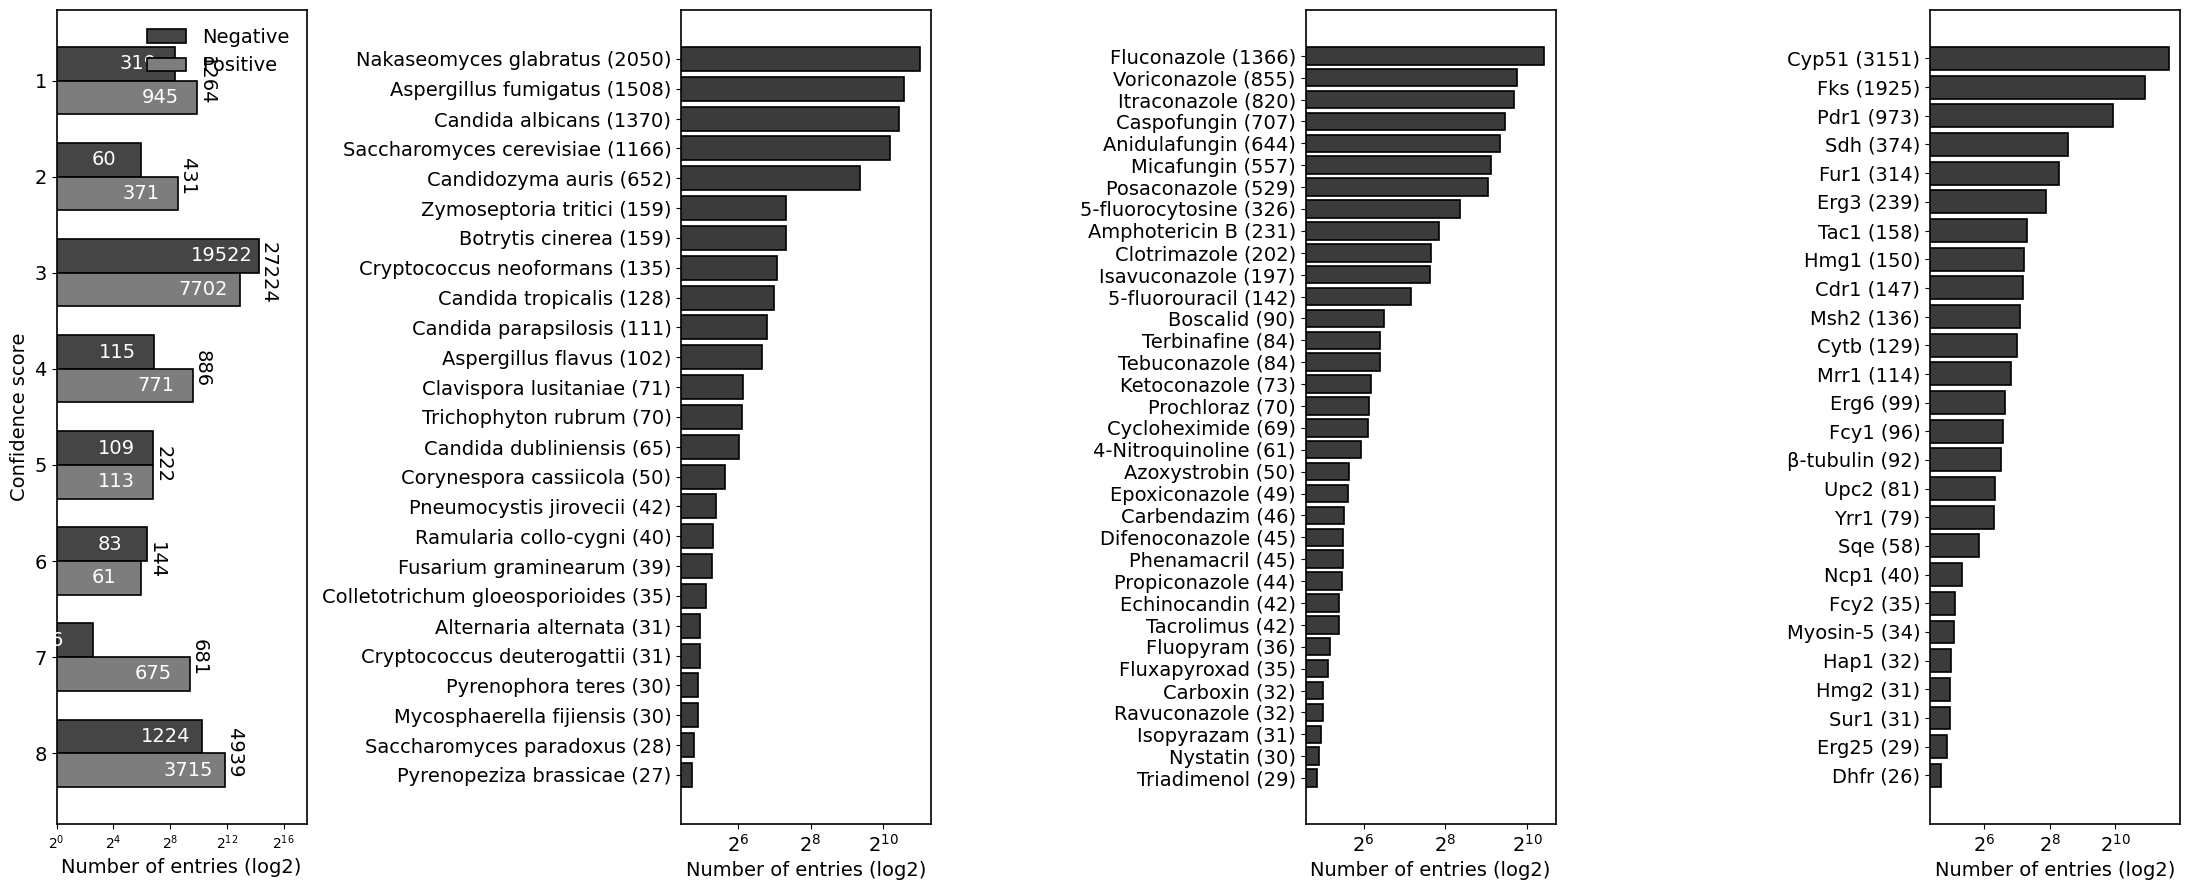

In [27]:
#fig summary database

fig, axs = plt.subplots(1, 4, figsize=(22, 9), gridspec_kw={'width_ratios': [2, 2, 2, 2]})

#PANEL 1: Confidence Score 
bar_width = 0.35
indices = np.arange(len(df_combined))

axs[0].barh(indices + bar_width / 2, df_combined['count_neg'], height=bar_width, color='#454545', edgecolor='black', linewidth=1.2, label='Negative')
axs[0].barh(indices - bar_width / 2, df_combined['count_pos'], height=bar_width, color='#7D7D7D', edgecolor='black', linewidth=1.2, label='Positive')

axs[0].set_yticks(indices)
axs[0].set_yticklabels(df_combined['confidence score'], fontsize=14)
axs[0].set_xscale('log', base=2)  
axs[0].set_ylabel('Confidence score', fontsize=14)
axs[0].set_xlabel('Number of entries (log2)', fontsize=14)
axs[0].set_xlim(1, 200000)
axs[0].legend(frameon=False, fontsize=14)

for index, row in df_combined.iterrows():
    axs[0].text(row['count_pos'] / 6, index - bar_width / 2, str(int(row['count_pos'])), va='center', ha='center', color='white', fontsize=14)
    axs[0].text(row['count_neg'] / 6, index + bar_width / 2, str(int(row['count_neg'])), va='center', ha='center', color='white', fontsize=14)
    
    total = max(row['count_pos'], row['count_neg'])
    axs[0].text(total, index, str(int(row['total_count'])), va='center', color='black', rotation=270, fontsize=14)

#PANEL 2: Species Entries 
axs[1].barh(bar_data_species.index[::-1], bar_data_species.values[::-1], color="#3B3B3B", edgecolor='black', linewidth=1.2)
axs[1].set_yticklabels(legend_labels_species[::-1], fontsize=14)
axs[1].set_xlabel('Number of entries (log2)', fontsize=14)
axs[1].set_xscale('log', base=2)  
axs[1].tick_params(axis='x', labelsize=14)

#PANEL 3: Drug Entries
axs[2].barh(bar_data_drugs.index[::-1], bar_data_drugs.values[::-1], color="#3B3B3B", edgecolor='black', linewidth=1.2)
axs[2].set_yticklabels(legend_labels_drugs[::-1], fontsize=14)
axs[2].set_xlabel('Number of entries (log2)', fontsize=14)
axs[2].set_xscale('log', base=2)  
axs[2].tick_params(axis='x', labelsize=14)

#PANEL 4: Gene Entries
axs[3].barh(bar_data_genes.index[::-1], bar_data_genes.values[::-1], color="#3B3B3B", edgecolor='black', linewidth=1.2)
axs[3].set_yticklabels(legend_labels_genes[::-1], fontsize=14)
axs[3].set_xlabel('Number of entries (log2)', fontsize=14)
axs[3].set_xscale('log', base=2)  
axs[3].tick_params(axis='x', labelsize=14)

for ax in axs:
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_linewidth(1.2)
    ax.spines['right'].set_linewidth(1.2)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()
plt.savefig('content_of_the_database_ALL_2025-02.svg', format='svg')
plt.show()